In [19]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def read_folder(folder):
    results_per_epoch = [x for x in os.listdir(folder) if "results_per_epoch.json" in x][0]
    results_per_epoch = os.path.join(folder, results_per_epoch)
    with open(results_per_epoch, 'r') as f:
        results_per_epoch = json.load(f)

    results_full = [x for x in os.listdir(folder) if "results_full.json" in x][0]
    results_full = os.path.join(folder, results_full)
    with open(results_full, 'r') as f:
        results_full = json.load(f)

    return results_per_epoch, results_full

def plot_per_epoch_results(index, mean, yerr, full_data, no_pretrain_data, plot_lr=True):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    # plot per epoch results
    ax.errorbar(index, mean, yerr=yerr,  elinewidth=3, capsize=3)
    # plot full results
    ax.plot(index, [full_data]*len(index), color='green', linestyle='dashed')
    # plot results without pre-training
    ax.plot(index, [no_pretrain_data]*len(index), color='orange', linestyle='dashed')

    if plot_lr:
        # fit linear regression line for auc_mean
        from sklearn.linear_model import LinearRegression
        X = np.array(index).reshape(-1, 1)
        y = mean
        model = LinearRegression().fit(X, y)
        # plot dashed red line of linear regression
        ax.plot(index, model.predict(X), color='red', linestyle='dashed')
        # ax setup
        ax.legend(["fully supervised", "no pre-training", "auc approximation", "pre-training epoch"])
    else:
        ax.legend(["fully supervised", "no pre-training", "pre-training epoch"])

    ax.grid()
    return ax

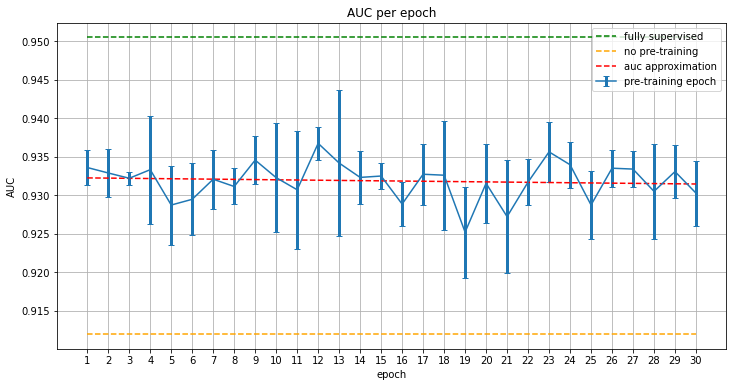

In [20]:
folder = os.path.join("MaskedLanguageModeling", "pretrain_epoch_analysis_1674855395")
results_per_epoch, results_full = read_folder(folder)

df = pd.DataFrame(results_per_epoch).transpose()
full_data = np.nanmean(results_full['full_data']['auc'])
no_pretrain_data = np.nanmean(results_full['non_pretrained']['auc'])
ax = plot_per_epoch_results(df.index, df["auc_mean"], df["auc_std"], full_data, no_pretrain_data)
ax.set_title("AUC per epoch")
ax.set_xlabel("epoch")
ax.set_ylabel("AUC")
pass

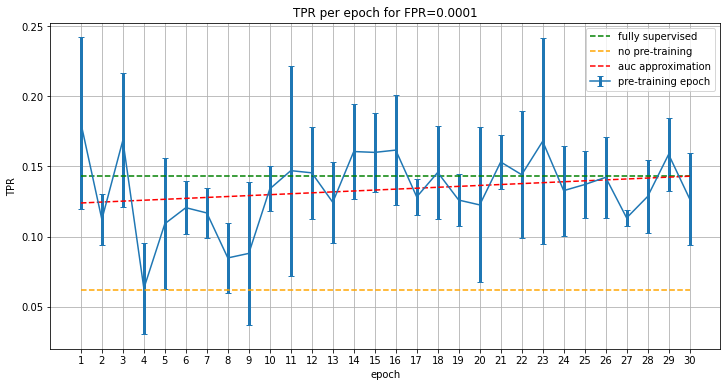

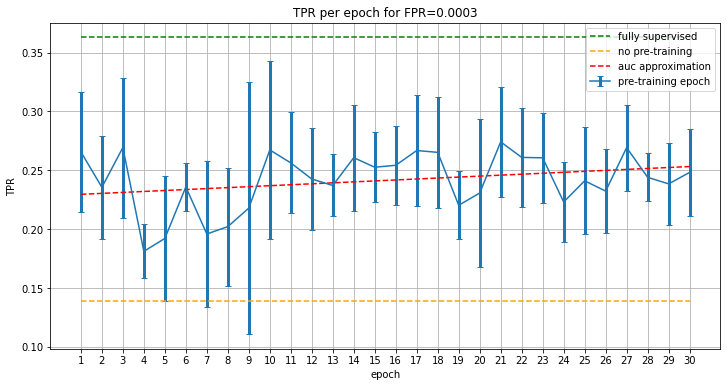

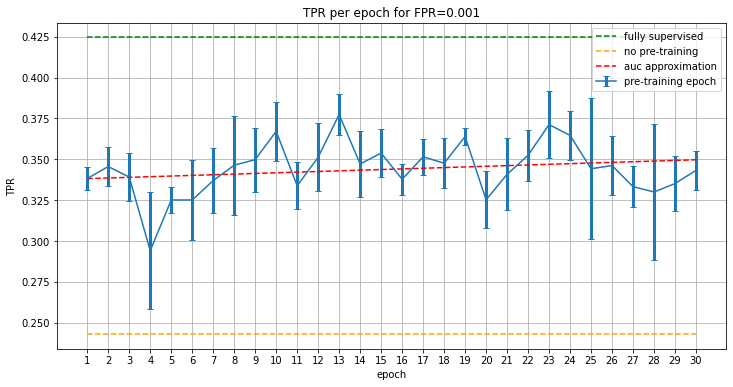

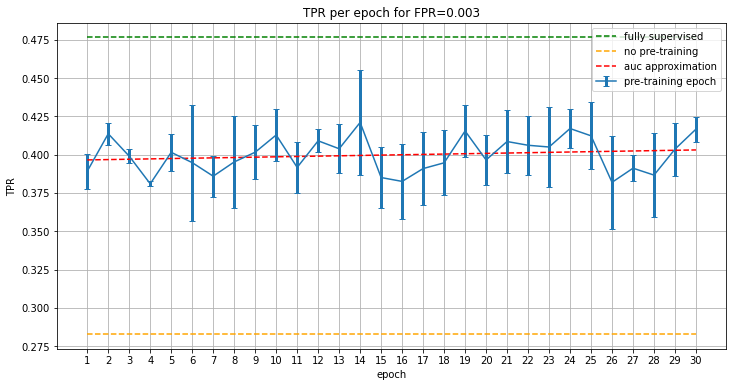

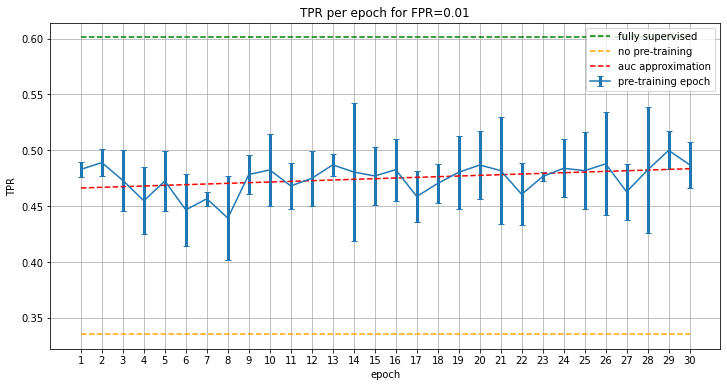

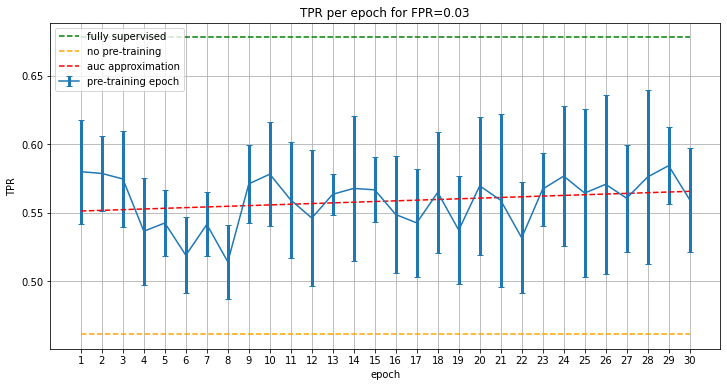

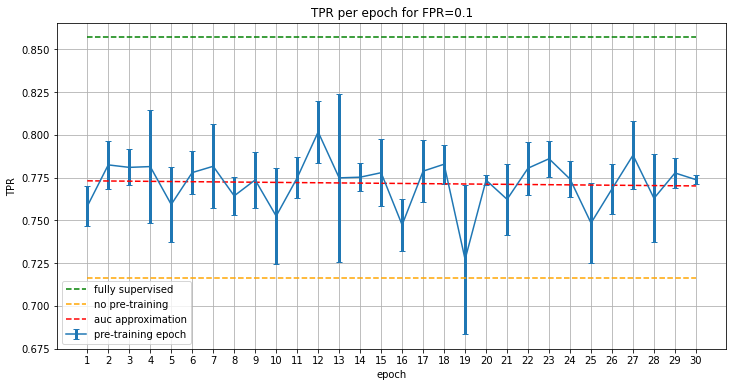

In [21]:
tpr_mean_df = pd.DataFrame(index=results_per_epoch.keys(), data=[results_per_epoch[x]['tpr_mean'] for x in results_per_epoch])
tpr_std_df = pd.DataFrame(index=results_per_epoch.keys(), data=[results_per_epoch[x]['tpr_std'] for x in results_per_epoch])

fprs = results_per_epoch['1']['tpr_mean'].keys()
for fpr in fprs:
    full_data = results_full['full_data'][f'fpr_{fpr}']['tpr_mean']
    no_pretrain_data = results_full['non_pretrained'][f'fpr_{fpr}']['tpr_mean']
    ax = plot_per_epoch_results(tpr_mean_df.index, tpr_mean_df[fpr], tpr_std_df[fpr], full_data, no_pretrain_data, plot_lr=True)
    ax.set_title(f"TPR per epoch for FPR={fpr}")
    ax.set_xlabel("epoch")
    ax.set_ylabel("TPR")

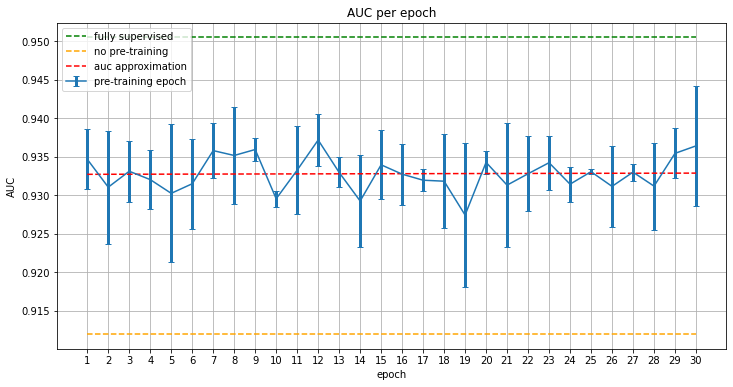

In [24]:
folder = os.path.join("MaskedLanguageModeling", "pretrain_epoch_analysis_mask_every_epoch_1674909969")
results_per_epoch, results_full = read_folder(folder)

df = pd.DataFrame(results_per_epoch).transpose()
full_data = np.nanmean(results_full['full_data']['auc'])
no_pretrain_data = np.nanmean(results_full['non_pretrained']['auc'])
ax = plot_per_epoch_results(df.index, df["auc_mean"], df["auc_std"], full_data, no_pretrain_data)
ax.set_title("AUC per epoch")
ax.set_xlabel("epoch")
ax.set_ylabel("AUC")
pass

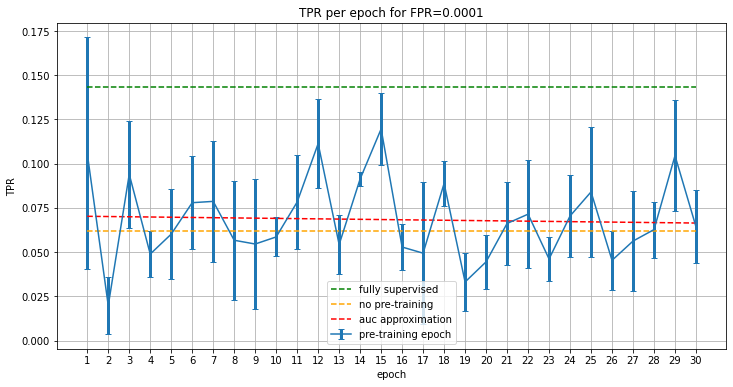

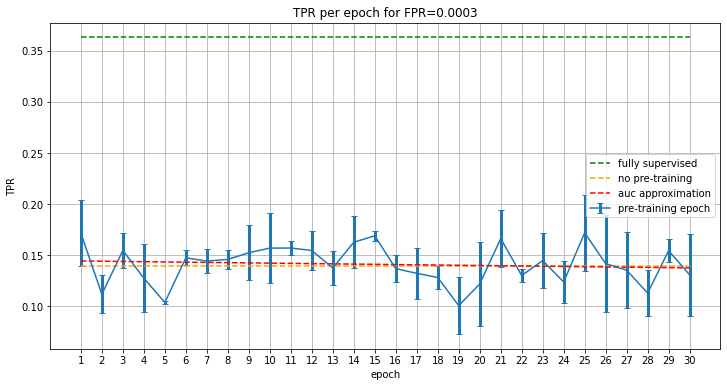

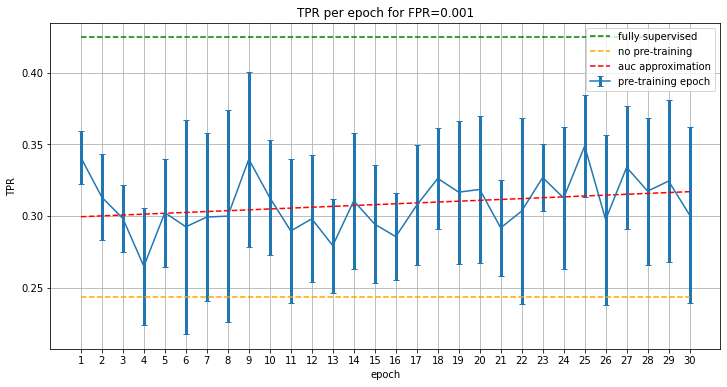

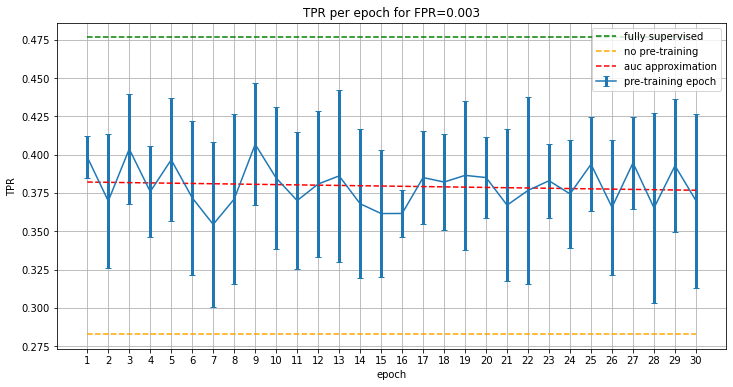

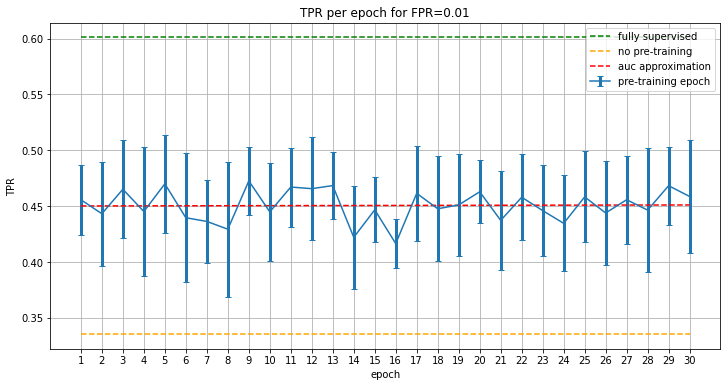

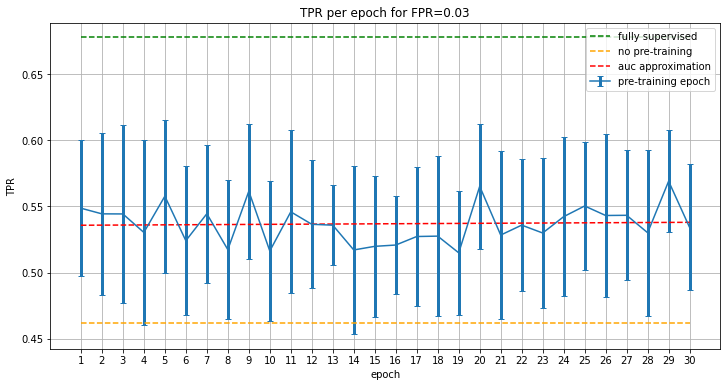

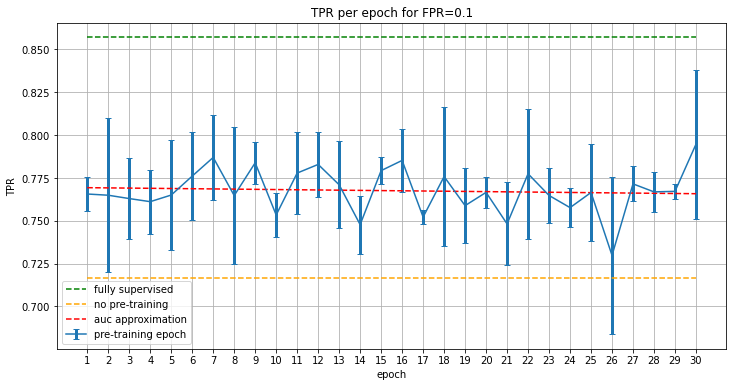

In [25]:
tpr_mean_df = pd.DataFrame(index=results_per_epoch.keys(), data=[results_per_epoch[x]['tpr_mean'] for x in results_per_epoch])
tpr_std_df = pd.DataFrame(index=results_per_epoch.keys(), data=[results_per_epoch[x]['tpr_std'] for x in results_per_epoch])

fprs = results_per_epoch['1']['tpr_mean'].keys()
for fpr in fprs:
    full_data = results_full['full_data'][f'fpr_{fpr}']['tpr_mean']
    no_pretrain_data = results_full['non_pretrained'][f'fpr_{fpr}']['tpr_mean']
    ax = plot_per_epoch_results(tpr_mean_df.index, tpr_mean_df[fpr], tpr_std_df[fpr], full_data, no_pretrain_data, plot_lr=True)
    ax.set_title(f"TPR per epoch for FPR={fpr}")
    ax.set_xlabel("epoch")
    ax.set_ylabel("TPR")